Check TF Version

In [0]:
import tensorflow as tf
tf.__version__

'1.14.0-rc1'

In [13]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist # 28*28 images of hand written digit 0-9

(x_train, y_train),(x_test, y_test) = mnist.load_data()

#normalize

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

#build model

model = tf.keras.models.Sequential() #Sequential feed forword
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) #sigma activation layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) #sigma actication layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) #classification number of softmax probabilty distribution 
                                                        #10 because dataset is numbers from 0 - 9
    
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)


Epoch 1/3
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2659 - acc: 0.9227
Epoch 2/3
60000/60000 [==============================] - 5s 79us/sample - loss: 0.1075 - acc: 0.9668
Epoch 3/3
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0719 - acc: 0.9773


In [2]:
val_loss , val_acc = model.evaluate(x_test, y_test)
print(val_loss , val_acc )


10000/10000 [==============================] - 0s 35us/sample - loss: 0.0983 - acc: 0.9689
0.09826816780641676 0.9689


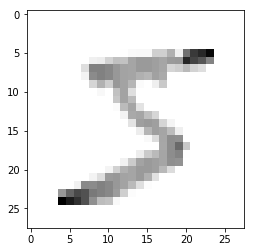

In [11]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

In [17]:
model.save('my_model.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          multiple                  0         
_________________________________________________________________
dense_3 (Dense)              multiple                  100480    
_________________________________________________________________
dense_4 (Dense)              multiple                  16512     
_________________________________________________________________
dense_5 (Dense)              multiple                  1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [19]:
new_model = tf.keras.models.load_model('my_model.h5')


W0617 01:44:34.626943 139680244025216 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0617 01:44:34.629200 139680244025216 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0617 01:44:34.808696 139680244025216 hdf5_format.py:263] Sequential models without an `input_shape` passed to the first layer cannot reload their optimizer state. As a result, your model isstarting with a freshly initiali

In [24]:
predictions = new_model.predict(x_test)
print(predictions)

[[3.40655326e-09 2.35780693e-08 8.59125339e-06 ... 9.99970794e-01
  6.07547008e-08 3.79545995e-09]
 [1.34194170e-10 8.25251409e-05 9.99902725e-01 ... 7.36996508e-09
  5.25862696e-08 4.06176343e-11]
 [3.09661097e-08 9.99721825e-01 6.36951017e-06 ... 1.30958928e-04
  7.60632320e-05 2.68455392e-06]
 ...
 [1.48356571e-09 2.25516914e-07 4.05843927e-08 ... 1.17508780e-05
  4.27140230e-06 1.53564732e-04]
 [7.91697687e-07 1.49717125e-05 1.38840107e-06 ... 2.10606286e-05
  1.63374899e-03 6.19540774e-09]
 [3.98552288e-07 1.96460199e-08 1.95970870e-06 ... 4.30372227e-09
  1.55013311e-06 1.94833105e-09]]


7


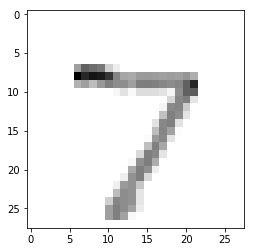

In [23]:
predictions = new_model.predict(x_test)
import numpy as np

print(np.argmax(predictions[0]))
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()